In [21]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

In [15]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info (slow)
print(msft.history(period="max"))

                                 Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.054792    0.062849    0.054792    0.060163   
1986-03-14 00:00:00-05:00    0.060163    0.063386    0.060163    0.062311   
1986-03-17 00:00:00-05:00    0.062311    0.063923    0.062311    0.063386   
1986-03-18 00:00:00-05:00    0.063386    0.063923    0.061237    0.061774   
1986-03-19 00:00:00-05:00    0.061774    0.062311    0.060163    0.060700   
...                               ...         ...         ...         ...   
2024-03-04 00:00:00-05:00  413.440002  417.350006  412.320007  414.920013   
2024-03-05 00:00:00-05:00  413.959991  414.250000  400.640015  402.649994   
2024-03-06 00:00:00-05:00  402.970001  405.160004  398.390015  402.089996   
2024-03-07 00:00:00-05:00  406.119995  409.779999  402.239990  409.140015   
2024-03-08 00:00:00-05:00  407.959991  410.420013  404.329987  406.220001   

In [16]:


df = pd.DataFrame(msft.history(period="max"))
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054791,0.062849,0.054791,0.060163,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,413.440002,417.350006,412.320007,414.920013,17596000,0.0,0.0
2024-03-05 00:00:00-05:00,413.959991,414.250000,400.640015,402.649994,26919200,0.0,0.0
2024-03-06 00:00:00-05:00,402.970001,405.160004,398.390015,402.089996,22344100,0.0,0.0


In [17]:
df.reset_index(level=0, inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13 00:00:00-05:00,0.054791,0.062849,0.054791,0.060163,1031788800,0.0,0.0
1,1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
2,1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
3,1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
4,1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...
9569,2024-03-04 00:00:00-05:00,413.440002,417.350006,412.320007,414.920013,17596000,0.0,0.0
9570,2024-03-05 00:00:00-05:00,413.959991,414.250000,400.640015,402.649994,26919200,0.0,0.0
9571,2024-03-06 00:00:00-05:00,402.970001,405.160004,398.390015,402.089996,22344100,0.0,0.0
9572,2024-03-07 00:00:00-05:00,406.119995,409.779999,402.239990,409.140015,18718500,0.0,0.0


In [5]:

# df.drop(columns=['Open', 'High', 'Low', 'Volume','Dividends',	'Stock Splits'], inplace=True)

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13 00:00:00-05:00,0.054791,0.062849,0.054791,0.060163,1031788800,0.0,0.0
1,1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
2,1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
3,1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
4,1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0


In [29]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9574.000000,9574.000000,9574.000000,9574.000000,9.574000e+03,9574.000000,9574.000000
mean,49.058160,49.564812,48.541191,49.073584,5.715955e+07,0.002934,0.001776
std,82.423904,83.230986,81.587338,82.453315,3.814098e+07,0.046133,0.058239
min,0.054791,0.056940,0.054791,0.055866,2.304000e+06,0.000000,0.000000
25%,3.476025,3.519536,3.403508,3.471190,3.266598e+07,0.000000,0.000000
50%,19.122234,19.312144,18.911622,19.132986,5.026420e+07,0.000000,0.000000
75%,36.700466,37.020990,36.247535,36.711634,7.111035e+07,0.000000,0.000000
max,419.783705,420.043233,414.323799,419.773712,1.031789e+09,3.080000,2.000000


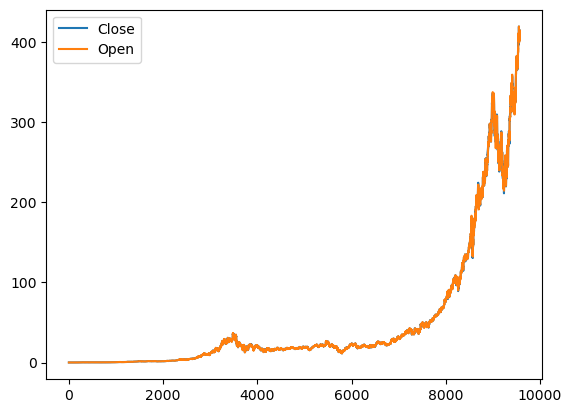

In [28]:
op=df['Open']
cls=df['Close']
plt.plot(cls,label='Close')
plt.plot(op,label='Open')
plt.legend()
plt.show()

In [25]:

close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

7659
1915


In [26]:
look_back = 15

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

C:\Users\goyal\AppData\Local\Temp\ipykernel_84\4093395873.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=num_epochs, verbose=1)


Epoch 1/100

383/383 [==============================] - 9s 13ms/step - loss: 81.2031
Epoch 2/100
383/383 [==============================] - 4s 11ms/step - loss: 0.6318
Epoch 3/100
383/383 [==============================] - 4s 10ms/step - loss: 0.5081
Epoch 4/100
383/383 [==============================] - 4s 10ms/step - loss: 0.4189
Epoch 5/100
383/383 [==============================] - 4s 10ms/step - loss: 0.3271
Epoch 6/100
383/383 [==============================] - 4s 12ms/step - loss: 0.2950
Epoch 7/100
383/383 [==============================] - 4s 10ms/step - loss: 0.2584
Epoch 8/100
383/383 [==============================] - 5s 12ms/step - loss: 0.2537
Epoch 9/100
383/383 [==============================] - 5s 12ms/step - loss: 0.2412
Epoch 10/100
383/383 [==============================] - 5s 12ms/step - loss: 0.2554
Epoch 11/100
383/383 [==============================] - 5s 13ms/step - loss: 0.2281
Epoch 12/100
383/383 [==============================] - 4s 9ms/step - loss: 0.1903


383/383 [==============================] - 4s 10ms/step - loss: 0.1467
Epoch 97/100
383/383 [==============================] - 4s 10ms/step - loss: 0.1495
Epoch 98/100
383/383 [==============================] - 3s 8ms/step - loss: 0.1489
Epoch 99/100
383/383 [==============================] - 4s 9ms/step - loss: 0.1550
Epoch 100/100
383/383 [==============================] - 4s 11ms/step - loss: 0.1745


In [38]:
import plotly.graph_objs as go
prediction = model.predict(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))
date_train = date_train[:len(close_train)]

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,

    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

1900/1900 [==============================] - 8s 4ms/step


ValueError: x and y must have same first dimension, but have shapes (1915,) and (1900,)

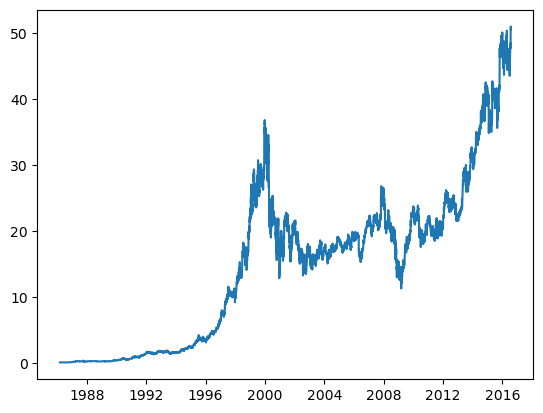

In [39]:
import matplotlib.pyplot as plt

plt.plot(date_train, close_train, label='Data')
plt.plot(date_test, prediction, label='Prediction')
plt.plot(date_test, close_test, label='Ground Truth')
plt.legend()
plt.title("Google Stock")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()


In [12]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.
